In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from pathlib import Path
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [2]:
#BRING IN STATE COUNTY FIPS CODES AND WHICH STATE THEY TRANSLATE TO
st_fips=pd.read_csv(
    Path("./Resources/us-state-ansi-fips.csv"),
     dtype= object
)
state= st_fips['stname']
st_code=st_fips[' st']

In [27]:
#CONVERT DATASET TO DICTIONARY
st_dict= {}
for key, value in zip(st_code, state):
    st_dict[key] =value
st_dict

{' 01': 'Alabama',
 ' 02': 'Alaska',
 ' 04': 'Arizona',
 ' 05': 'Arkansas',
 ' 06': 'California',
 ' 08': 'Colorado',
 ' 09': 'Connecticut',
 ' 10': 'Delaware',
 ' 11': 'District of Columbia',
 ' 12': 'Florida',
 ' 13': 'Georgia',
 ' 15': 'Hawaii',
 ' 16': 'Idaho',
 ' 17': 'Illinois',
 ' 18': 'Indiana',
 ' 19': 'Iowa',
 ' 20': 'Kansas',
 ' 21': 'Kentucky',
 ' 22': 'Louisiana',
 ' 23': 'Maine',
 ' 24': 'Maryland',
 ' 25': 'Massachusetts',
 ' 26': 'Michigan',
 ' 27': 'Minnesota',
 ' 28': 'Mississippi',
 ' 29': 'Missouri',
 ' 30': 'Montana',
 ' 31': 'Nebraska',
 ' 32': 'Nevada',
 ' 33': 'New Hampshire',
 ' 34': 'New Jersey',
 ' 35': 'New Mexico',
 ' 36': 'New York',
 ' 37': 'North Carolina',
 ' 38': 'North Dakota',
 ' 39': 'Ohio',
 ' 40': 'Oklahoma',
 ' 41': 'Oregon',
 ' 42': 'Pennsylvania',
 ' 44': 'Rhode Island',
 ' 45': 'South Carolina',
 ' 46': 'South Dakota',
 ' 47': 'Tennessee',
 ' 48': 'Texas',
 ' 49': 'Utah',
 ' 50': 'Vermont',
 ' 51': 'Virginia',
 ' 53': 'Washington',
 ' 54': 'We

In [28]:
#BRING IN HOUSING DATASET\CONVERT LEADING ZEROES
usda = pd.read_csv(
    Path("./Resources/proj_2_team3.csv"),
    converters={'State-County FIPS': str},   
)
usda.head()

,State-County FIPS,Active Loans,Average Borrower Gross Income,Very Low Income,Low Income,Moderate Income,Average Debt Ratio,American Indian/\r\nAlaskan Native,Asian,Black/\r\nAfrican-America,...,Unknown HSG Proj Type,Detached Structure,Attached Structure,Unknown Stucture,Manufactured Homes,Average Living Area (Square Ft),Average Request Amount,Average Loan Amount,Average LTV,Average Appraised Value
0,01001,123,"54,069.98",1,10,111,0.35,0,0,11,...,3,119,1,3,0,"1,608","141,430.75","140,690.34",0.98,"143,260.25"
1,01003,"1,300","53,844.14",14,122,"1,142",0.36,4,2,76,...,46,"1,241",13,46,1,"1,688","132,843.54","131,807.31",1.00,"133,171.71"
2,01005,67,"44,365.34",5,14,48,0.36,0,0,25,...,4,63,0,4,0,"1,518","101,446.28","101,311.15",0.96,"105,179.10"
3,01007,83,"52,175.29",3,6,73,0.34,0,0,11,...,2,80,1,2,0,"1,413","109,024.70","108,577.41",0.97,"112,278.05"
4,01009,579,"51,319.76",6,78,486,0.34,2,3,7,...,20,551,8,20,0,"1,445","115,258.32","114,486.41",0.98,"116,973.32"


In [29]:
#REMOVE UNECESSARY COLUMNS & drop null values
usda=usda.drop(columns=["Very Low Income", "Low Income", "Moderate Income", "Active Loans", "American Indian/\r\nAlaskan Native", "White","Hispanic", "First Time Home Buyer", "Unknown Stucture", "Average Request Amount", "Active Loans","Asian","Black/\r\nAfrican-America","Unknown  HSG Proj Type", "Hawaiian/Pacific Islander","Average Debt Ratio",
                        "PUD", "Disability","Manufactured Homes", "Coop", "Average LTV", "Average Borrower Age","Condo"],axis=1)
usda.dropna()

,State-County FIPS,Average Borrower Gross Income,Married,Average No of Depend,Average Hshld Size,Detached Structure,Attached Structure,Average Living Area (Square Ft),Average Loan Amount,Average Appraised Value
0,01001,"54,069.98",56,0.8,2.1,119,1,"1,608","140,690.34","143,260.25"
1,01003,"53,844.14",615,0.7,2.2,"1,241",13,"1,688","131,807.31","133,171.71"
2,01005,"44,365.34",25,0.9,2.1,63,0,"1,518","101,311.15","105,179.10"
3,01007,"52,175.29",38,0.7,2.1,80,1,"1,413","108,577.41","112,278.05"
4,01009,"51,319.76",274,0.7,2.1,551,8,"1,445","114,486.41","116,973.32"
...,...,...,...,...,...,...,...,...,...,...
3145,72153,"30,076.57",102,0.5,1.5,188,2,"1,060","86,391.18","108,770.87"
3146,78010,"45,773.42",47,0.5,1.0,45,10,"1,192","98,783.60","135,043.55"
3147,78020,"35,594.00",0,0.3,1.3,4,1,904,"68,383.33","307,000.00"
3148,78030,"50,152.09",21,0.3,0.9,11,1,"1,101","101,912.79","158,409.09"


In [30]:
#PULL STATE ID IDENTIFIERS FROM STATE-COUNTRY FIPS
usda["State ID"]=usda["State-County FIPS"].str[:2]

In [31]:
#LIST COLUMNS
usda.columns

Index(['State-County FIPS', 'Average Borrower Gross Income', 'Married',
       'Average No of Depend', 'Average Hshld Size', 'Detached Structure',
       'Attached Structure', 'Average Living Area (Square Ft)',
       'Average Loan Amount', 'Average Appraised Value', 'State ID'],
      dtype='object')

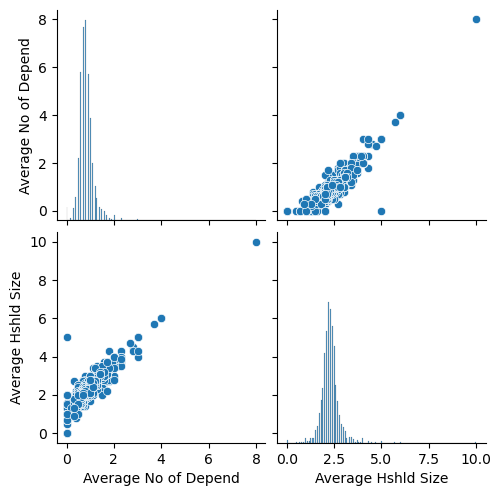

In [32]:
#REMOVE SPECIAL CHARACTERS TO FIT AND SCALE DATA,  VISUALIZE THE DATA
for column in usda.columns:
    usda[column] = usda[column].replace('[\,]','',regex=True)

sns.pairplot(usda)

In [33]:
#REVIEW DATA WHILE REFERRING TO VISUALS
usda.head()


,State-County FIPS,Average Borrower Gross Income,Married,Average No of Depend,Average Hshld Size,Detached Structure,Attached Structure,Average Living Area (Square Ft),Average Loan Amount,Average Appraised Value,State ID
0,01001,54069.98,56,0.8,2.1,119,1,1608,140690.34,143260.25,01
1,01003,53844.14,615,0.7,2.2,1241,13,1688,131807.31,133171.71,01
2,01005,44365.34,25,0.9,2.1,63,0,1518,101311.15,105179.10,01
3,01007,52175.29,38,0.7,2.1,80,1,1413,108577.41,112278.05,01
4,01009,51319.76,274,0.7,2.1,551,8,1445,114486.41,116973.32,01


<Axes: >

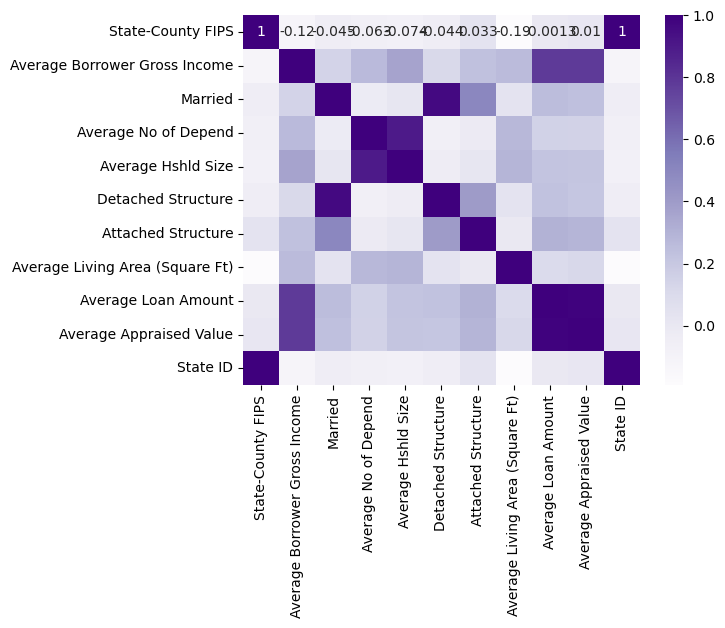

In [10]:
#CORRELATE FEATURES
housing_corr = usda.corr()
sns.heatmap(housing_corr, cmap="Purples", annot=True)

In [11]:

#DEFINE FEATURES 
X = usda.drop('Average Appraised Value',axis=1)
#DEFINE TARGET
y = usda['Average Appraised Value']

#TRAIN, TEST, AND SPLIT THE DATASET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
#SCALE THE DATA
housing_scaler = StandardScaler().fit_transform(usda[['Average Borrower Gross Income', 'Married',
       'Average No of Depend', 'Average Hshld Size', 'Detached Structure',
       'Attached Structure', 'Average Living Area (Square Ft)',
       'Average Loan Amount', 'Average Appraised Value']])

#TRANSFORMED
housing_transformed = pd.DataFrame(housing_scaler, columns=['Average Borrower Gross Income', 'Married',
       'Average No of Depend', 'Average Hshld Size', 'Detached Structure',
       'Attached Structure', 'Average Living Area (Square Ft)',
       'Average Loan Amount', 'Average Appraised Value'])
                                
housing_transformed.head()    

,Average Borrower Gross Income,Married,Average No of Depend,Average Hshld Size,Detached Structure,Attached Structure,Average Living Area (Square Ft),Average Loan Amount,Average Appraised Value
0,0.356260,-0.384882,-0.097198,-0.394736,-0.386668,-0.223774,0.782946,0.679491,0.658622
1,0.330976,2.390020,-0.385225,-0.183773,2.339514,0.032557,1.205677,0.460783,0.413798
2,-0.730244,-0.538768,0.190829,-0.394736,-0.522734,-0.245135,0.307375,-0.290056,-0.265512
3,0.144136,-0.474235,-0.385225,-0.394736,-0.481428,-0.223774,-0.247458,-0.111155,-0.093238
4,0.048353,0.697280,-0.385225,-0.394736,0.662985,-0.074248,-0.078366,0.034329,0.020704


In [13]:
#COLUMN AND DATA TYPES TRANSFORMED
housing_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Average Borrower Gross Income    3150 non-null   float64
 1   Married                          3150 non-null   float64
 2   Average No of Depend             3150 non-null   float64
 3   Average Hshld Size               3150 non-null   float64
 4   Detached Structure               3150 non-null   float64
 5   Attached Structure               3150 non-null   float64
 6   Average Living Area (Square Ft)  3150 non-null   float64
 7   Average Loan Amount              3150 non-null   float64
 8   Average Appraised Value          3150 non-null   float64
dtypes: float64(9)
memory usage: 221.6 KB


In [14]:
#INITIATE SCALER
housing_scaler = StandardScaler()

# FIT SCALER
housing_scaler.fit(X_train)

# TRANSFORM TRAINING AND TESTING SETS
X_train_scaled = housing_scaler.transform(X_train)
X_test_scaled = housing_scaler.transform(X_test)

In [15]:
#FIT LINEAR REGRESSION MODEL
regr=LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

In [16]:
#CREATE PREDICTIONS
predictions = regr.predict(X_test)

In [17]:
#MEAN ABSOLUTE ERROR
mean_absolute_error(y_test, predictions)

2534.3675354350144

In [18]:
#PRINT LINEAR COEFFICIENTS
regr.coef_

array([-7.75430279e+00,  1.34777698e-01,  3.90443168e-01,  1.10139989e+03,
       -2.07757050e+03, -1.97439984e+00, -3.28395229e+00,  4.39711064e+00,
        9.86783899e-01,  7.81142394e+03])

In [19]:
#DISPLAY MEAN SQ. ERROR
mean_squared_error(y_test, predictions)

29160535.919531994

In [20]:
#DISPLAY LINEAR REG INTERCEPT
regr.intercept_

-5293.324114488118

In [21]:
#DISPLAY R2 SCORE
r2_score(y_test, predictions)

0.9827481942781277

In [22]:
#COEFFICIENTS
coef_dict={}
for coef, feat in zip(regr.coef_,X.columns):
    coef_dict[feat] = coef
coef_dict

{'State-County FIPS': -7.754302787091625,
 'Average Borrower Gross Income': 0.13477769801602332,
 'Married': 0.39044316787027283,
 'Average No of Depend': 1101.399892967683,
 'Average Hshld Size': -2077.570496612258,
 'Detached Structure': -1.9743998385472836,
 'Attached Structure': -3.283952289532834,
 'Average Living Area (Square Ft)': 4.3971106449034,
 'Average Loan Amount': 0.9867838988893386,
 'State ID': 7811.423940187179}

In [23]:
#DEFINE COEFFICIENT NAMES
coef_names= X.columns
print(coef_names)

Index(['State-County FIPS', 'Average Borrower Gross Income', 'Married',
       'Average No of Depend', 'Average Hshld Size', 'Detached Structure',
       'Attached Structure', 'Average Living Area (Square Ft)',
       'Average Loan Amount', 'State ID'],
      dtype='object')


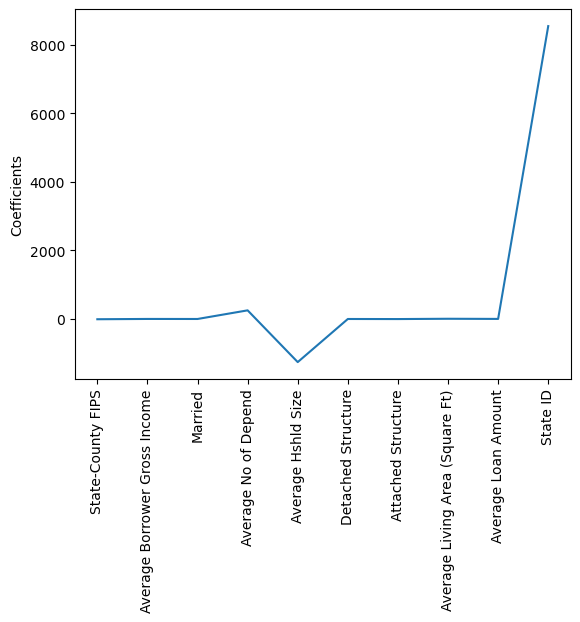

In [40]:
#VISUALIZE COEFFICIENTS
linear_coef=regr.fit(X,y).coef_

plt.plot(range(len(coef_names)), linear_coef)
plt.xticks(range(len(coef_names)), coef_names, rotation=90)
plt.ylabel("Coefficients")
plt.show()


Text(0.5, 0, 'Linear Regression Model')

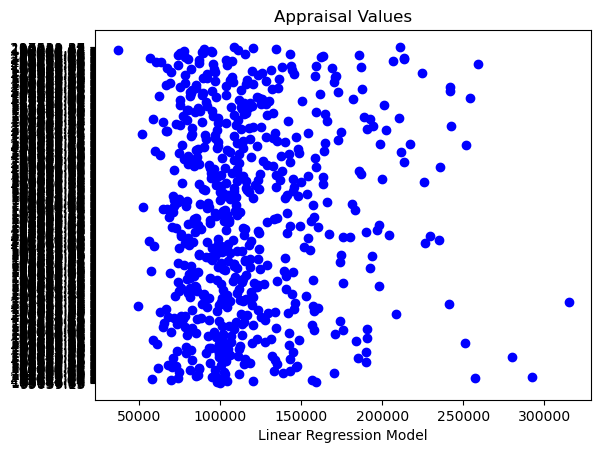

In [38]:
plt.scatter(predictions, y_test, color='blue')
plt.title('Appraisal Values')
plt.xlabel(xlabel="Linear Regression Model")

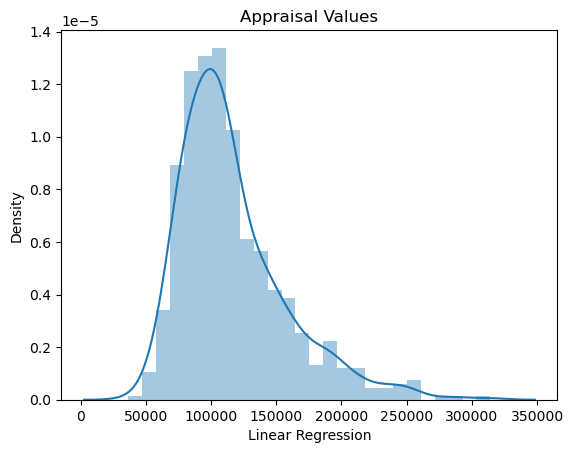

In [39]:
predict_linear= regr.predict(X_test)
sns.distplot(predict_linear)
plt.xlabel('Linear Regression')
plt.title('Appraisal Values')
plt.show()
